# **Fourier Decomposition of polarized light intensity to study the generation of various polarizations of light using Quarter Wave Plates and Polarizers.**

The first polarizer produces horizontally polarized light and theta = 0 radians. The polarizer will be kept at this orientation for the remainder of this experiment.

The second quarter wave plate angle QWP 2 (radians) is represented by the variable beta in our setup.

The photodiode's voltage output (V) is represented by the variables PDV10, PDV20 and PDV 30 in our setup.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.2



The first Quarter Wave Plate QWP 1 is oriented at **alpha = 10 degrees** for this part of the experiment.

We will now be measuring the voltage output (V) of the photodiode in our setup.

We will then be plotting the **voltage output (V)** against the QWP 2 angle **beta (radians)**.

In [ ]:
beta = np.array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340, 360])

beta_rad = np.radians(beta)

n = 1.94 # Normalization factor calculated using Jones Calculus

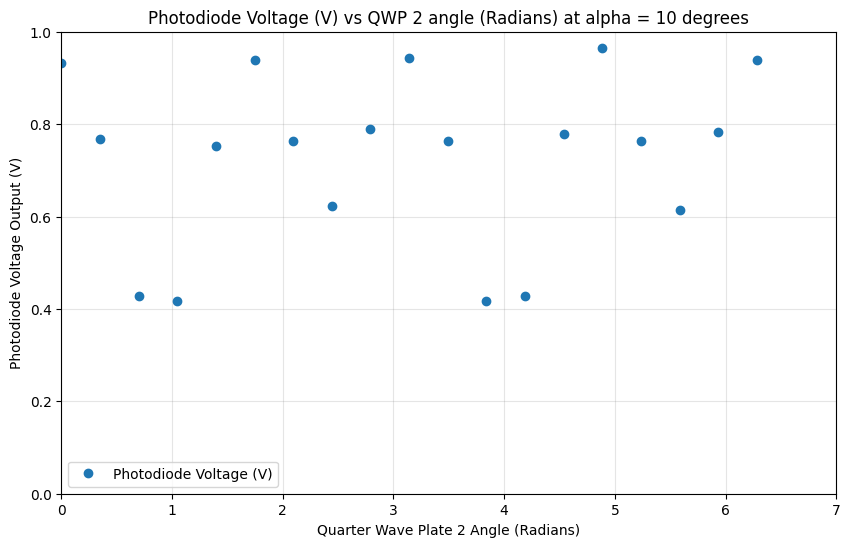

In [ ]:
PDV10 = np.array([1.81, 1.49, 0.83, 0.81, 1.46, 1.82, 1.48, 1.21, 1.53, 1.83, 1.48,
       0.81, 0.83, 1.51, 1.87, 1.48, 1.19, 1.52, 1.82])

PDV10n = PDV10/n

plt.figure(figsize=(10, 6))
plt.plot(beta_rad, PDV10n, 'o', label='Photodiode Voltage (V)')
plt.legend()
plt.xlabel('Quarter Wave Plate 2 Angle (Radians)')
plt.ylabel('Photodiode Voltage Output (V)')
plt.title('Photodiode Voltage (V) vs QWP 2 angle (Radians) at alpha = 10 degrees')
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.show()

The first Quarter Wave Plate is oriented at **alpha = 20 degrees** for this part of the experiment.

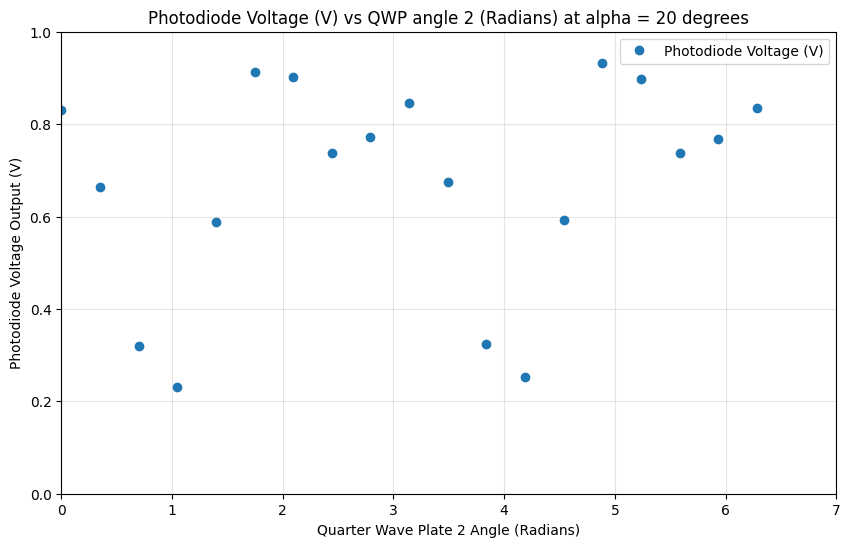

In [ ]:
PDV20 = np.array([1.61, 1.29, 0.62, 0.45, 1.14, 1.77, 1.75, 1.43, 1.5 , 1.64, 1.31,
       0.63, 0.49, 1.15, 1.81, 1.74, 1.43, 1.49, 1.62])

PDV20n = PDV20/n

plt.figure(figsize=(10, 6))
plt.plot(beta_rad, PDV20n, 'o', label='Photodiode Voltage (V)')
plt.legend()
plt.xlabel('Quarter Wave Plate 2 Angle (Radians)')
plt.ylabel('Photodiode Voltage Output (V)')
plt.title('Photodiode Voltage (V) vs QWP angle 2 (Radians) at alpha = 20 degrees')
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.show()

The first Quarter Wave Plate is oriented at **alpha = 30 degrees** for this part of the experiment.

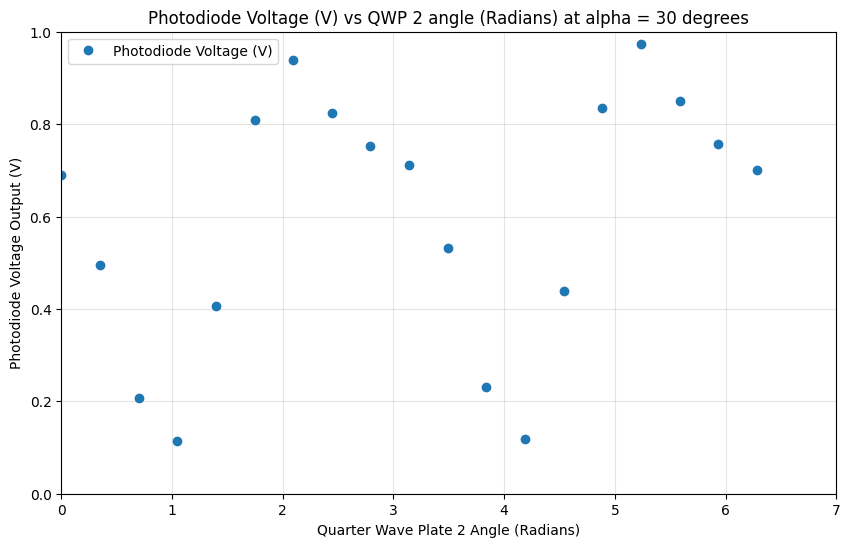

In [ ]:
PDV30 = np.array([1.34, 0.96, 0.4 , 0.22, 0.79, 1.57, 1.82, 1.6 , 1.46, 1.38, 1.03,
       0.45, 0.23, 0.85, 1.62, 1.89, 1.65, 1.47, 1.36])

PDV30n = PDV30/n

plt.figure(figsize=(10, 6))
plt.plot(beta_rad, PDV30n, 'o', label='Photodiode Voltage (V)')
plt.legend()
plt.xlabel('Quarter Wave Plate 2 Angle (Radians)')
plt.ylabel('Photodiode Voltage Output (V)')
plt.title('Photodiode Voltage (V) vs QWP 2 angle (Radians) at alpha = 30 degrees')
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.show()

We will now use these plots to determine the **Fourier Coefficients** of the Fourier representation of the intensity amplitude for our polarized light wave.

We will then plot the **photodiode voltage, the least squares fit and the theoretical model** together to compare our data.

In [ ]:
A1 = np.column_stack((
    np.ones(len(beta_rad)-1),
    np.sin(2 * beta_rad[:-1]),
    np.sin(4 * beta_rad[:-1]),
    np.cos(4 * beta_rad[:-1])
))

X = np.array(['C0', 'S2', 'S4', 'C4'])
B1 = PDV10n[:-1].reshape(-1, 1)
A_pseudo_inverse = np.linalg.pinv(A1)
X_1 = A_pseudo_inverse.dot(B1)

print("The Fourier Coefficients corresponding to alpha = 10 degrees are:")
print(X_1)

The Fourier Coefficients corresponding to alpha = 10 degrees are:
[[ 0.71477663]
 [-0.1253886 ]
 [ 0.07257965]
 [ 0.21138945]]


In [ ]:
alpha_1_10 = ((np.arccos(8 * X_1[0] -5))/4) * 57.2958
alpha_2_10 = ((np.arcsin(-2 * X_1[1]))/2) * 57.2958
alpha_3_10 = ((np.arcsin(8 * X_1[2]))/4) * 57.2958
alpha_4_10 = ((np.arccos(8 * X_1[3] -1))/4) * 57.2958

print("The angle alpha corresponding to these coefficients is:")
print(alpha_1_10)
print(alpha_2_10)
print(alpha_3_10)
print(alpha_4_10)

print("The average value for the angle alpha is:")
avg_alpha_10 = float(alpha_1_10 + alpha_2_10 + alpha_3_10 + alpha_4_10)/4
print(avg_alpha_10)

print("The percentage error in measurement of the angle alpha is:")
print(str(np.round(float(10-avg_alpha_10)/10*100 , 1)) + "%")


The angle alpha corresponding to these coefficients is:
[11.02321804]
[7.26175635]
[8.87384622]
[11.57038299]
The average value for the angle alpha is:
9.682300899231485
The percentage error in measurement of the angle alpha is:
3.2%


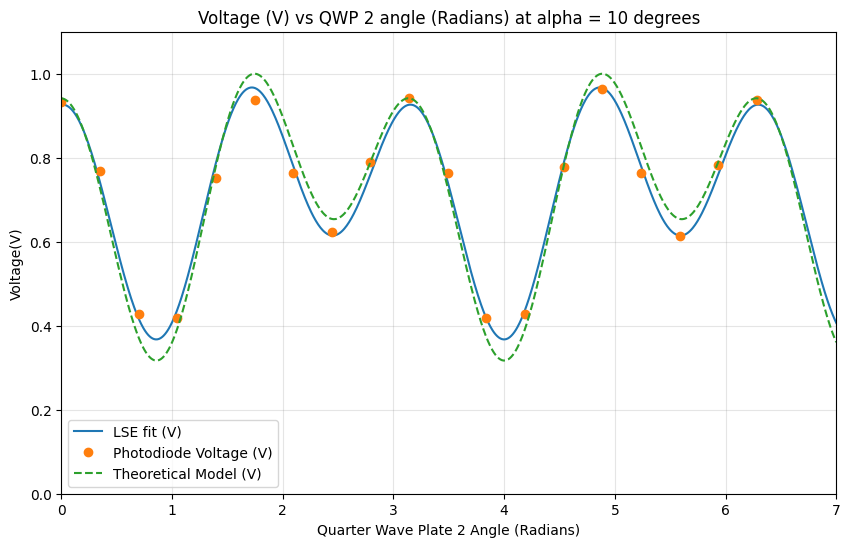

In [ ]:
beta_LSE = np.linspace(0, 7, 1000)

LSE_voltage_10 = X_1[0] + X_1[1] * np.sin(2*beta_LSE) + X_1[2] * np.sin(4*beta_LSE) + X_1[3] * np.cos(4*beta_LSE)

theoretical_coefficients_10 = [(5+np.cos(40*0.0174533))/8 , -np.sin(20*0.0174533)/2 , np.sin(40*0.0174533)/8, (1+np.cos(40*0.0174533))/8]

theoretical_voltage_10 =   theoretical_coefficients_10[0]  \
                         + theoretical_coefficients_10[1] * np.sin(2*beta_LSE) \
                         + theoretical_coefficients_10[2] * np.sin(4*beta_LSE) \
                         + theoretical_coefficients_10[3] * np.cos(4*beta_LSE)

plt.figure(figsize=(10, 6))
plt.plot(beta_LSE, LSE_voltage_10, '-', label='LSE fit (V)')
plt.plot(beta_rad, PDV10n, 'o', label='Photodiode Voltage (V)')
plt.plot(beta_LSE, theoretical_voltage_10, '--', label = 'Theoretical Model (V)')
plt.legend()
plt.xlabel('Quarter Wave Plate 2 Angle (Radians)')
plt.ylabel('Voltage(V)')
plt.title('Voltage (V) vs QWP 2 angle (Radians) at alpha = 10 degrees')
plt.xlim(0, 7)
plt.ylim(0, 1.1)
plt.show()

In [ ]:
B2 = PDV20n[:-1].reshape(-1, 1)
X_2 = A_pseudo_inverse.dot(B2)
print(X_2)

[[ 0.66580756]
 [-0.25691858]
 [ 0.12043719]
 [ 0.15121635]]


In [ ]:
alpha_1_20 = ((np.arccos(8 * X_2[0] -5))/4) * 57.2958
alpha_2_20 = ((np.arcsin(-2 * X_2[1]))/2) * 57.2958
alpha_3_20 = ((np.arcsin(8 * X_2[2]))/4) * 57.2958
alpha_4_20 = ((np.arccos(8 * X_2[3] -1))/4) * 57.2958

print("The angle alpha corresponding to these coefficients is:")
print(alpha_1_20)
print(alpha_2_20)
print(alpha_3_20)
print(alpha_4_20)

print("The average value for the angle alpha is:")
avg_alpha_20 = float(alpha_1_20 + alpha_2_20 + alpha_3_20 + alpha_4_20)/4
print(avg_alpha_20)

print("The percentage error in measurement of the angle alpha is:")
print(str(np.round(float(20-avg_alpha_20)/20*100 , 1)) + "%")

The angle alpha corresponding to these coefficients is:
[17.73648602]
[15.45988594]
[18.61788794]
[19.47336239]
The average value for the angle alpha is:
17.821905572148264
The percentage error in measurement of the angle alpha is:
10.9%


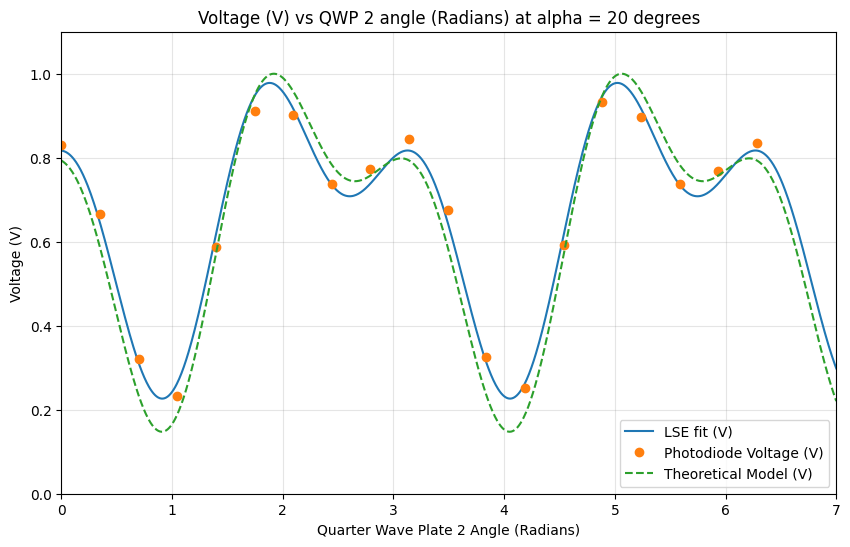

In [ ]:
beta_LSE = np.linspace(0, 7, 1000)

LSE_voltage_20 = X_2[0] + X_2[1] * np.sin(2*beta_LSE) + X_2[2] * np.sin(4*beta_LSE) + X_2[3] * np.cos(4*beta_LSE)

theoretical_coefficients_20 = [(5+np.cos(80*0.0174533))/8 , -np.sin(40*0.0174533)/2 , np.sin(80*0.0174533)/8, (1+np.cos(80*0.0174533))/8]

theoretical_voltage_20 =   theoretical_coefficients_20[0]  \
                         + theoretical_coefficients_20[1] * np.sin(2*beta_LSE) \
                         + theoretical_coefficients_20[2] * np.sin(4*beta_LSE) \
                         + theoretical_coefficients_20[3] * np.cos(4*beta_LSE)

plt.figure(figsize=(10, 6))
plt.plot(beta_LSE, LSE_voltage_20, '-', label='LSE fit (V)')
plt.plot(beta_rad, PDV20n, 'o', label='Photodiode Voltage (V)')
plt.plot(beta_LSE, theoretical_voltage_20, '--', label = 'Theoretical Model (V)')
plt.legend()
plt.xlabel('Quarter Wave Plate 2 Angle (Radians)')
plt.ylabel('Voltage (V)')
plt.title('Voltage (V) vs QWP 2 angle (Radians) at alpha = 20 degrees')
plt.xlim(0, 7)
plt.ylim(0, 1.1)
plt.show()

In [ ]:
B3 = PDV30n[:-1].reshape(-1, 1)
X_3 = A_pseudo_inverse.dot(B3)
print(X_3)

[[ 0.59364261]
 [-0.36203511]
 [ 0.11872829]
 [ 0.07683871]]


In [ ]:
alpha_1_30 = ((np.arccos(8 * X_3[0] -5))/4) * 57.2958
alpha_2_30 = ((np.arcsin(-2 * X_3[1]))/2) * 57.2958
alpha_3_30 = ((np.arcsin(8 * X_3[2]))/4) * 57.2958
alpha_4_30 = ((np.arccos(8 * X_3[3] -1))/4) * 57.2958

print("The angle alpha corresponding to these coefficients is:")
print(alpha_1_30)
print(alpha_2_30)
print(alpha_3_30)
print(alpha_4_30)

print("The average value for the angle alpha is:")
avg_alpha_30 = float(alpha_1_30 + alpha_2_30 + alpha_3_30 + alpha_4_30)/4
print(avg_alpha_30)

print("The percentage error in measurement of the angle alpha is:")
print(str(np.round(float(30-avg_alpha_30)/30*100 , 1)) + "%")

The angle alpha corresponding to these coefficients is:
[26.13209822]
[23.19578617]
[17.94332854]
[28.16545077]
The average value for the angle alpha is:
23.859165924338892
The percentage error in measurement of the angle alpha is:
20.5%


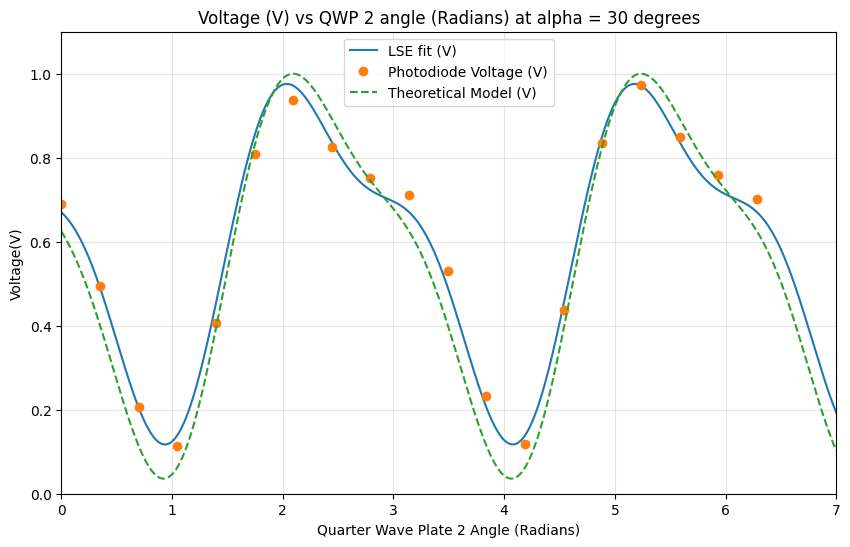

In [ ]:
beta_LSE = np.linspace(0, 7, 1000)

LSE_voltage_30 = X_3[0] + X_3[1] * np.sin(2*beta_LSE) + X_3[2] * np.sin(4*beta_LSE) + X_3[3] * np.cos(4*beta_LSE)

theoretical_coefficients_30 = [(5+np.cos(120*0.0174533))/8 , -np.sin(60*0.0174533)/2 , np.sin(120*0.0174533)/8, (1+np.cos(120*0.0174533))/8]

theoretical_voltage_30 =   theoretical_coefficients_30[0]  \
                         + theoretical_coefficients_30[1] * np.sin(2*beta_LSE) \
                         + theoretical_coefficients_30[2] * np.sin(4*beta_LSE) \
                         + theoretical_coefficients_30[3] * np.cos(4*beta_LSE)

plt.figure(figsize=(10, 6))
plt.plot(beta_LSE, LSE_voltage_30, '-', label='LSE fit (V)')
plt.plot(beta_rad, PDV30n, 'o', label='Photodiode Voltage (V)')
plt.plot(beta_LSE, theoretical_voltage_30, '--', label = 'Theoretical Model (V)')
plt.legend()
plt.xlabel('Quarter Wave Plate 2 Angle (Radians)')
plt.ylabel('Voltage(V)')
plt.title('Voltage (V) vs QWP 2 angle (Radians) at alpha = 30 degrees')
plt.xlim(0, 7)
plt.ylim(0, 1.1)
plt.show()

That's all for this one!

We will continue with a more thorough analysis of Stokes vectors and parameters in the next lab.